
Сходимость достигнута на итерации 2!
FSR = 29.880 МГц
Ближайший пик: 193548387.240646 МГц
Отличие от цели: 0.493872 МГц
Длина первого кольца 6.87682235792485


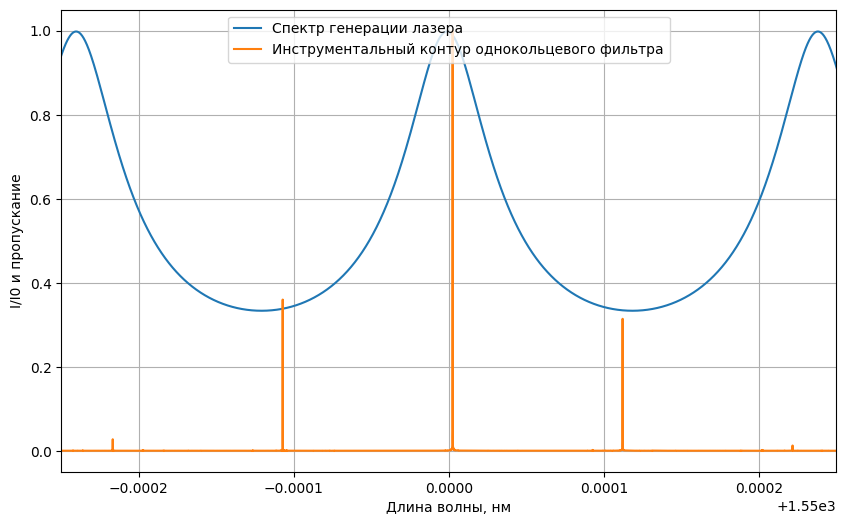

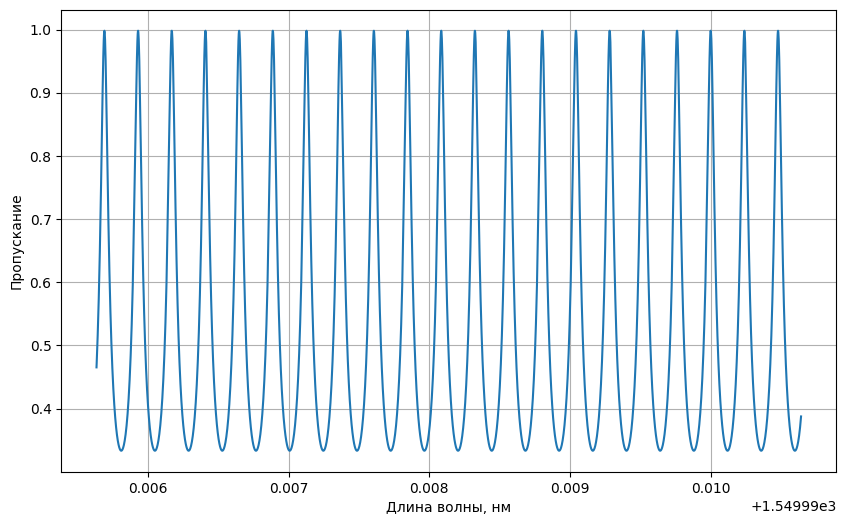

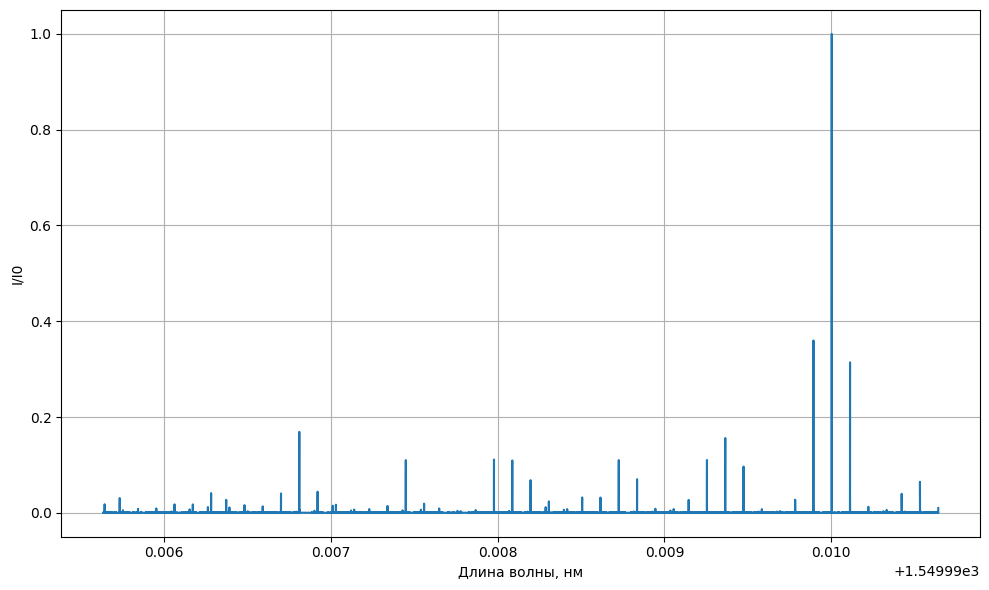

In [7]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
# Загрузка данных
df = pd.read_csv('50mks1mSA0.csv')
spectr1 = np.array(df.iloc[:,0])
spectr1 = np.linspace(1.4100E-04, 6.4100E-04, 625000)
Spectr1 = np.array(df.iloc[:,1])
dt = spectr1[1] - spectr1[0]
# Вычисление FFT
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]
fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))
# Константы
c = 3e8
n = 1.46
h = 1550e-9
α = 0.00018
k1 = 0.5
k2 = 0.5
n = 1.46
c = 3e8
S1 = np.sqrt(k1)
S2 = np.sqrt(k2)
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
f_Er = c/h
freq = freq - 80e6 + c/h
#Вычисление FSR
def calculate_peaks(FSR):
    l = c / (n * FSR)
    γ = np.exp(-α * l)
    T = n*l/c
    def t_filter_first(w):
        z = np.exp(1j*w*2*np.pi*T)
        return  -(S1*S2*np.sqrt(γ*(z**(-1)))/(1-C1*C2*γ*z**(-1)))
    T_values = np.abs(np.array([t_filter_first(w) for w in freq]))
    peaks, _ = find_peaks(T_values, height = 0.6)
    return freq[peaks]
def find_matching_fsr(target_freq, initial_fsr, tolerance, step, max_iterations=100000):
    FSR = initial_fsr
    best_fsr = None
    best_diff = float('inf')
    best_peak = None
    iteration = 0
    while iteration < max_iterations:
        iteration += 1
        peaks = calculate_peaks(FSR)
        if len(peaks) == 0:
            # Если нет пиков, увеличиваем FSR и продолжаем
            FSR += step
            continue
        diffs = np.abs(peaks - target_freq)
        min_diff = np.min(diffs)
        closest_peak = peaks[np.argmin(diffs)]
        # Обновляем лучший результат
        if min_diff < best_diff:
            best_diff = min_diff
            best_fsr = FSR
            best_peak = closest_peak
        # Проверяем сходимость
        if min_diff <= tolerance:
            print(f"\nСходимость достигнута на итерации {iteration}!")
            print(f"FSR = {FSR/1e6:.3f} МГц")
            print(f"Ближайший пик: {closest_peak/1e6:.6f} МГц")
            print(f"Отличие от цели: {(closest_peak - target_freq)/1e6:.6f} МГц")
            return FSR
        FSR-=step
    return best_fsr
target_frequency = c/h - 0.35e6
# Поиск подходящего FSR
matched_fsr = find_matching_fsr(
    target_frequency, 
    initial_fsr = 29.89e6, 
    tolerance = 0.5e6, 
    step = 0.01e6,    
    max_iterations = 100000)
l = c / (n  * matched_fsr)
print("Длина первого кольца",l)
def t_filter_first(w):
    T = n*l/c
    γ = np.exp(-α * l)
    z = np.exp(1j*w*2*np.pi*T)
    return  -(S1*S2*np.sqrt(γ*(z**(-1)))/(1-C1*C2*γ*z**(-1)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)
T_values = np.abs(T_filter_first(freq))
lambdasus = c/freq/(1e-9)
plt.figure(figsize = (10,6))
plt.plot(lambdasus, T_values, label = 'Спектр генерации лазера')
plt.legend()
plt.xlim([h/(1e-9)- 2.5e-4 , h/(1e-9) + 2.5e-4])
plt.plot(lambdasus, np.abs(fft_signal_norm), label = 'Инструментальный контур однокольцевого фильтра')
plt.legend()
plt.xlabel('Длина волны, нм')
plt.ylabel('I/I0 и пропускание')
plt.grid()
plt.figure(figsize = (10,6))
plt.plot(lambdasus, T_values)
plt.xlabel('Длина волны, нм')
plt.ylabel('Пропускание')
plt.grid()
plt.figure(figsize = (10,6))
plt.plot(lambdasus, np.abs(fft_signal_norm))
plt.xlabel('Длина волны, нм')
plt.ylabel('Пропускание')
plt.xlabel('Длина волны, нм')
plt.ylabel('I/I0')
plt.grid(True)
plt.tight_layout()

plt.show()


Сходимость достигнута на итерации 2!
FSR = 296.700 МГц
Ближайший пик: 193548386.476647 МГц
Отличие от цели: -0.270127 МГц
Длина первого кольца 2.07764865576132
Длина второго кольца 2.7701982076817595


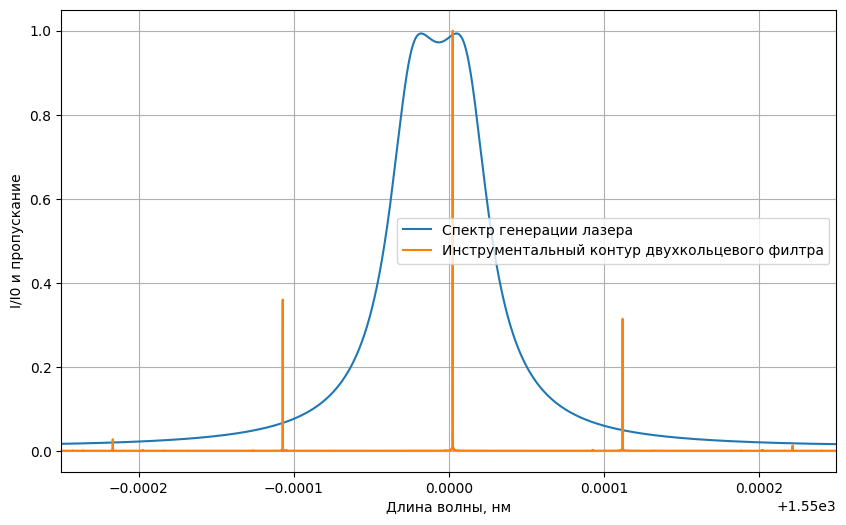

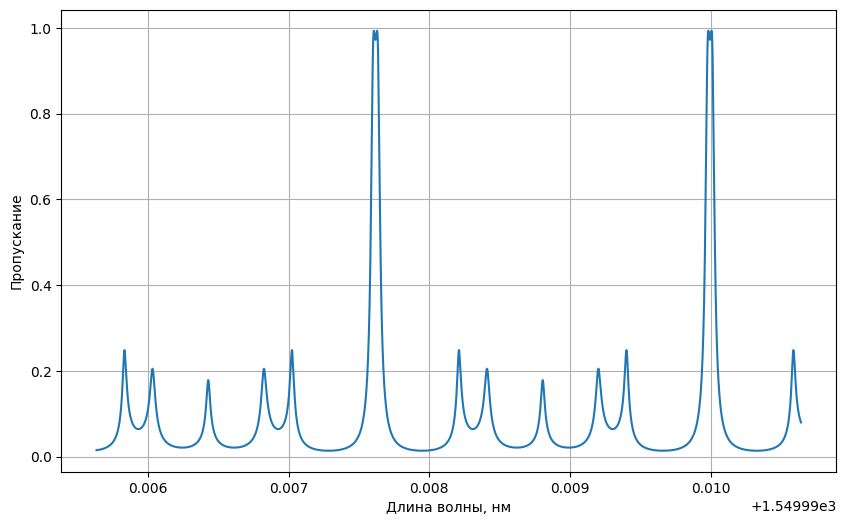

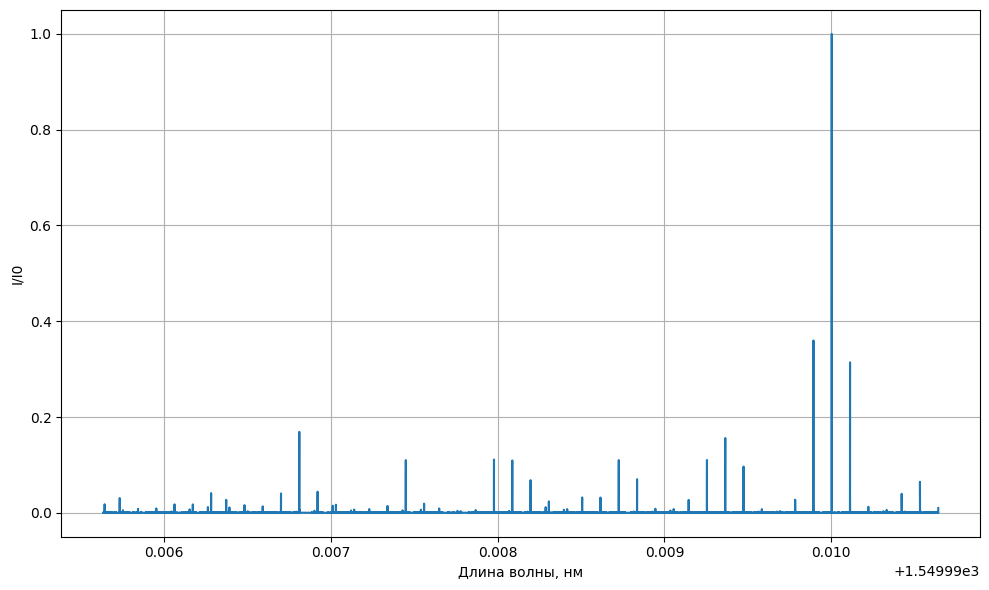

C:\Users\Orange\AppData\Local\Temp\ipykernel_24288\83661086.py:129: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


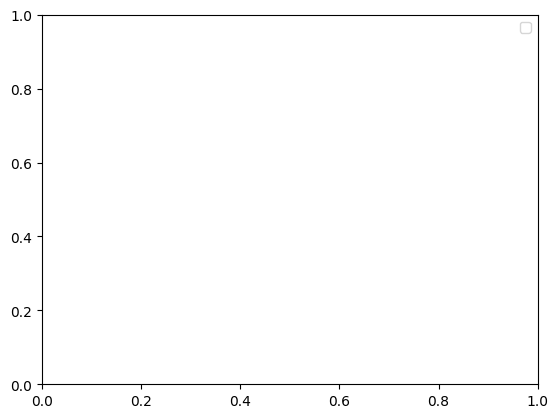

In [6]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
# Загрузка данных
df = pd.read_csv('50mks1mSA0.csv')
spectr1 = np.array(df.iloc[:,0])
spectr1 = np.linspace(1.4100E-04, 6.4100E-04, 625000)
Spectr1 = np.array(df.iloc[:,1])
dt = spectr1[1] - spectr1[0]
# Вычисление FFT
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]
fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))
# Константы
c = 3e8
n = 1.46
h = 1550e-9
N = 3
M = 4
α = 0.00018
k1 = k3 = 0.25
k2 = 0.032
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)
f_Er = c/h
freq = freq - 80e6 + c/h
#Вычисление FSR
def calculate_peaks(FSR):
    l = N * c / (n * FSR)
    L = M/N * l
    γ1 = np.exp(-α * l) 
    γ2 = np.exp(-α * L)
    T1 = n*l/c
    T2 = n*L/c
    def t_filter_first(w):
        z = np.exp(1j*w*2*np.pi*T1/N)
        return (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M)))) / \
               (1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M) + \
                C1 * C3 * γ1 * γ2 * z**(-(N + M)))
    T_values = np.abs(np.array([t_filter_first(w) for w in freq]))
    peaks, _ = find_peaks(T_values, height = 0.6)
    return freq[peaks]
def find_matching_fsr(target_freq, initial_fsr, tolerance, step, max_iterations=100000):
    FSR = initial_fsr
    best_fsr = None
    best_diff = float('inf')
    best_peak = None
    iteration = 0
    while iteration < max_iterations:
        iteration += 1
        peaks = calculate_peaks(FSR)
        if len(peaks) == 0:
            # Если нет пиков, увеличиваем FSR и продолжаем
            FSR += step
            continue
        diffs = np.abs(peaks - target_freq)
        min_diff = np.min(diffs)
        closest_peak = peaks[np.argmin(diffs)]
        # Обновляем лучший результат
        if min_diff < best_diff:
            best_diff = min_diff
            best_fsr = FSR
            best_peak = closest_peak
        # Проверяем сходимость
        if min_diff <= tolerance:
            print(f"\nСходимость достигнута на итерации {iteration}!")
            print(f"FSR = {FSR/1e6:.3f} МГц")
            print(f"Ближайший пик: {closest_peak/1e6:.6f} МГц")
            print(f"Отличие от цели: {(closest_peak - target_freq)/1e6:.6f} МГц")
            return FSR
        FSR-=step
    return best_fsr
target_frequency = c/h - 0.35e6
matched_fsr = find_matching_fsr(
    target_frequency, 
    initial_fsr = 296.800e6, 
    tolerance = 0.5e6, 
    step = 0.1e6,     
    max_iterations = 100000)
l = N * c / (n  * matched_fsr)
print("Длина первого кольца",l)
L = M/N * l
print("Длина второго кольца",L)
def t_filter_first(w):
    γ1 = np.exp(-α * l) 
    γ2 = np.exp(-α * L)
    T1 = n*l/c
    T2 = n*L/c
    z = np.exp(1j*w*2*np.pi*T1/N)
    return  (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M))))/(1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M)\
        + C1 * C3 * γ1 * γ2 * z**(-(N + M)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)
T_values = np.abs(T_filter_first(freq))
lambdasus = c/freq/(1e-9) 
plt.figure(figsize = (10,6))
plt.plot(lambdasus, T_values, label = 'Спектр генерации лазера')
plt.legend()
plt.xlim([h/(1e-9)- 2.5e-4 , h/(1e-9) + 2.5e-4])
plt.plot(lambdasus, np.abs(fft_signal_norm), label = 'Инструментальный контур двухкольцевого филтра')
plt.legend()
plt.xlabel('Длина волны, нм')
plt.ylabel('I/I0 и пропускание')
plt.grid()
plt.figure(figsize = (10,6))
plt.plot(lambdasus, T_values)
plt.xlabel('Длина волны, нм')
plt.ylabel('Пропускание')
plt.grid()
plt.figure(figsize = (10,6))
plt.plot(lambdasus, np.abs(fft_signal_norm))
plt.xlabel('Длина волны, нм')
plt.ylabel('Пропускание')
plt.xlabel('Длина волны, нм')
plt.ylabel('I/I0')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.legend()

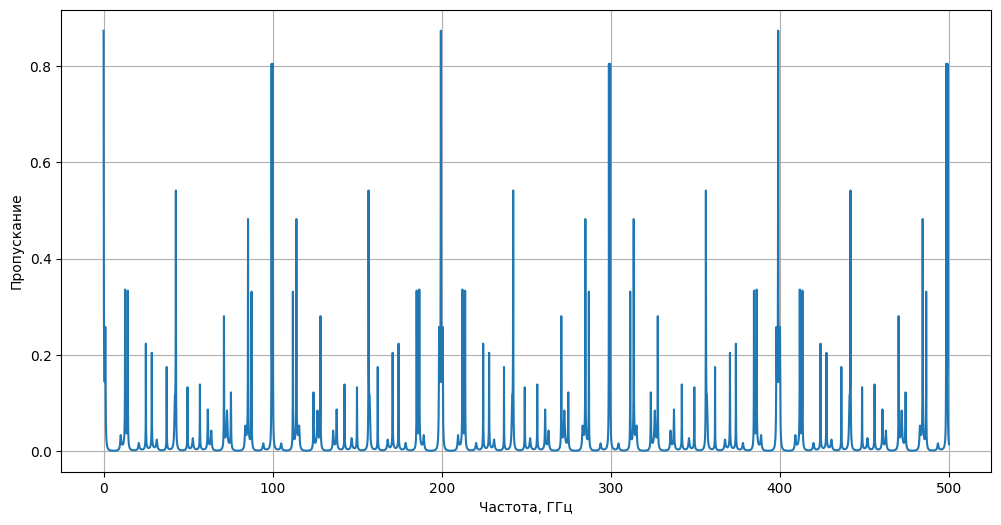

In [1]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
#%matplotlib qt 
freq = np.linspace(1.0, 5*10e10, 1000000 )
k1 = k2 = 0.27
k3 = k4 = 0.03
l = 19.57e-3
L = 16.48e-3
S = 14.42e-3
n = 1.46
c = 3e8
q = 0.9988
N = 19
M = 16
O = 14
T1 = n*l/c
T2 = n*L/c
T3 = n*S/c
α = 0.1
γ1 = np.exp(-α * l)
γ2 = np.exp(-α * L)
γ3 = np.exp(-α * S)
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)
C4 = np.sqrt(1-k4)
def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*T1/N)
    return  (q**4*np.sqrt(z**(-(N+M+O))*k1*k2*k3*k4*γ1*γ2*γ3))/(1 - q**2*C1*C2*γ1*z**(-N) - q**2*C2*C3*γ2*z**(-M) - q**2*C3*C4*γ3*z**(-O) + q**2*C1*C3*γ1*γ2*z**(-(N+M)) + q**2*C2*C4*γ2*γ3*z**(-(M+O)) + q**4*C1*C2*C3*C4*γ1*γ3*z**(-(N+O)) - q**2*C1*C4*γ1*γ2*γ3*z**(-(N+M+O)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)
T_values = np.abs(T_filter_first(freq))
plt.figure(figsize=(12, 6))
plt.plot(freq/1e9, T_values)
#plt.xlim(100e6, 500e6)
plt.xlabel('Частота, ГГц')
plt.ylabel('Пропускание')
#plt.title('График пропускания волоконного фильтра')
plt.grid(True)
plt.show()

FWHM в МГЦ: 17.640017640018463
FSR в ГГЦ: 0.20531020531020355


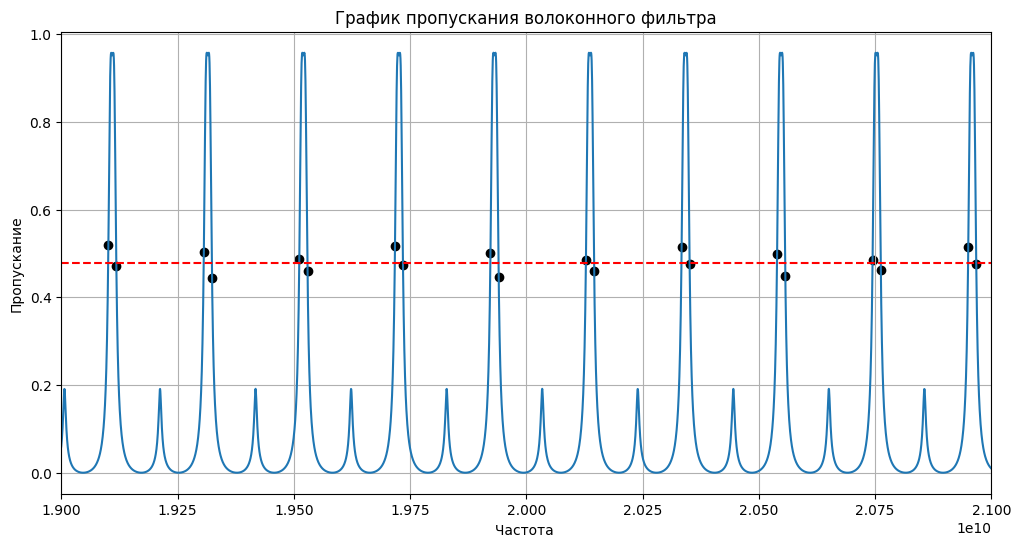

In [9]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
#%matplotlib qt 
freq = np.linspace(1e10, 5*10e10, 1000000)
k1 = k3 = 0.3
k2 = k1**2/(2-k1**2)
N = 1
M = 2
l = 1.0
L = M/N * l
n = 1.46
c = 3e8
T1 = n*l/c
T2 = n*L/c
α = 0.00018
γ1 = np.exp(-α * l)
γ2 = np.exp(-α * L)
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)
def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*(T1 / N))
    return  (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M))))/(1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M)\
        + C1 * C3 * γ1 * γ2 * z**(-(N + M)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)
T_values = np.abs(T_filter_first(freq))
T_values = T_values - np.min(T_values)
max_amplitude = np.max(T_values)
half_max_amplitude = max_amplitude / 2
# Поиск точек пересечения с половиной максимума
crossings = []
for i in range(len(T_values)):
    if (T_values[i] - half_max_amplitude) * (T_values[i-1] - half_max_amplitude) <= 0:
        crossings.append((freq[i], T_values[i]))
    if i == len(T_values)-1:
        fwhm = abs(crossings[7][0] - crossings[6][0])
        print(f"FWHM в МГЦ: {fwhm/1e6}") 
# Поиск пиков
peaks, _ = find_peaks(T_values)
# Определение максимального пика
print('FSR в ГГЦ:', (abs(crossings[1][0]-crossings[3][0]))/1e9)
# Построим график зависимости модуля пропускания от частоты
plt.figure(figsize=(12, 6))
plt.plot(freq, T_values)
plt.axhline(half_max_amplitude, color='r', linestyle='--')  # линия половины максимума
plt.scatter([c[0] for c in crossings], [c[1] for c in crossings], color='k')  # точки пересечения
plt.xlim(1.90e10, 2.1e10)
plt.xlabel('Частота ')
plt.ylabel('Пропускание')
plt.title('График пропускания волоконного фильтра')
plt.grid(True)
plt.show()

FWHM в МГЦ: 21.600021599805594
FSR в МГЦ: 34.3000342996913


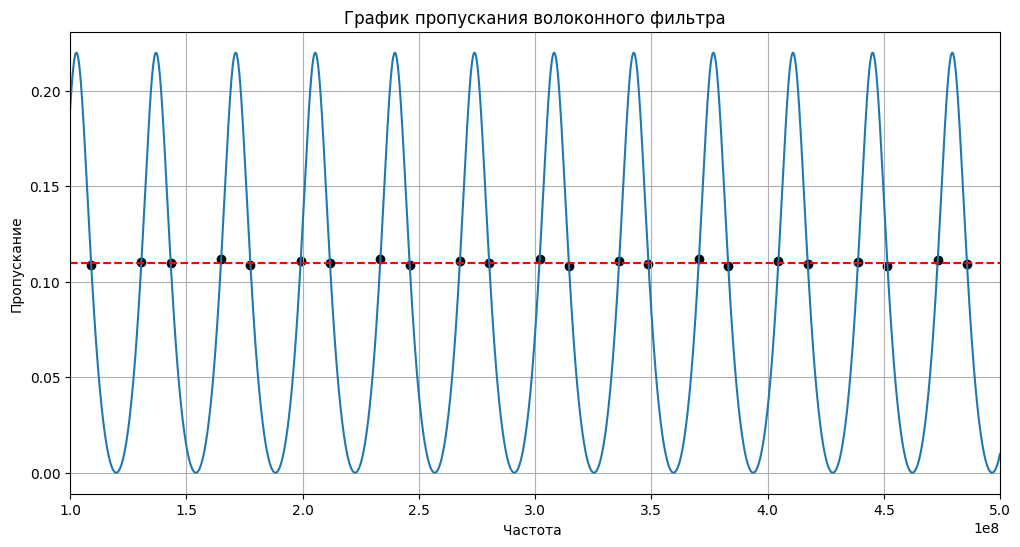

In [7]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
#%matplotlib qt 
freq = np.linspace(1.0, 10e10, 1000000 )
k1 = 0.5
k2 = 0.5
n = 1.46
c = 3e8
S1 = np.sqrt(k1)
S2 = np.sqrt(k2)
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
α = 0.1
L = 6.0
γ = np.exp(-α * L)
T = n*L/c
def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*T)
    return  -(S1*S2*np.sqrt(γ*(z**(-1)))/(1-C1*C2*γ*z**(-1)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)
T_values = np.abs(T_filter_first(freq))
T_values = T_values - np.min(T_values)
max_amplitude = np.max(T_values)
half_max_amplitude = max_amplitude / 2
# Поиск точек пересечения с половиной максимума
crossings = []
for i in range(len(T_values)):
    if (T_values[i] - half_max_amplitude) * (T_values[i-1] - half_max_amplitude) <= 0:
        crossings.append((freq[i], T_values[i]))
    if i == len(T_values)-1:
        fwhm = abs(crossings[3][0] - crossings[2][0])
        print(f"FWHM в МГЦ: {fwhm/1e6}")
# Поиск пиков
peaks, _ = find_peaks(T_values)
# Определение максимального пика
print('FSR в МГЦ:', (freq[peaks[1]]-freq[peaks[0]])/1e6)
#print('FWHM в МГЦ:', 39.500039499644515)
# Построим график зависимости модуля пропускания от частоты
plt.figure(figsize=(12, 6))
plt.plot(freq, T_values)
plt.axhline(half_max_amplitude, color='r', linestyle='--')  # линия половины максимума
plt.scatter([c[0] for c in crossings], [c[1] for c in crossings], color='k')  # точки пересечения
plt.xlim(100e6, 500e6)
plt.xlabel('Частота ')
plt.ylabel('Пропускание')
plt.title('График пропускания волоконного фильтра')
plt.grid(True)
plt.show()

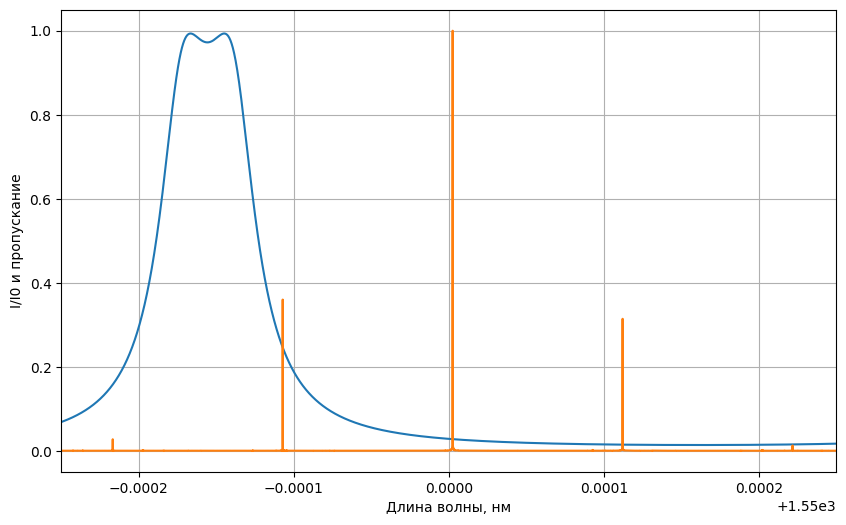

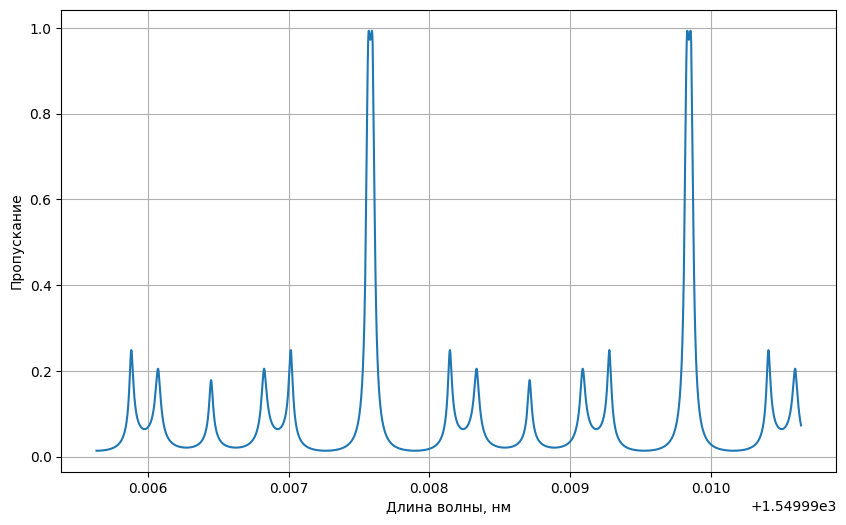

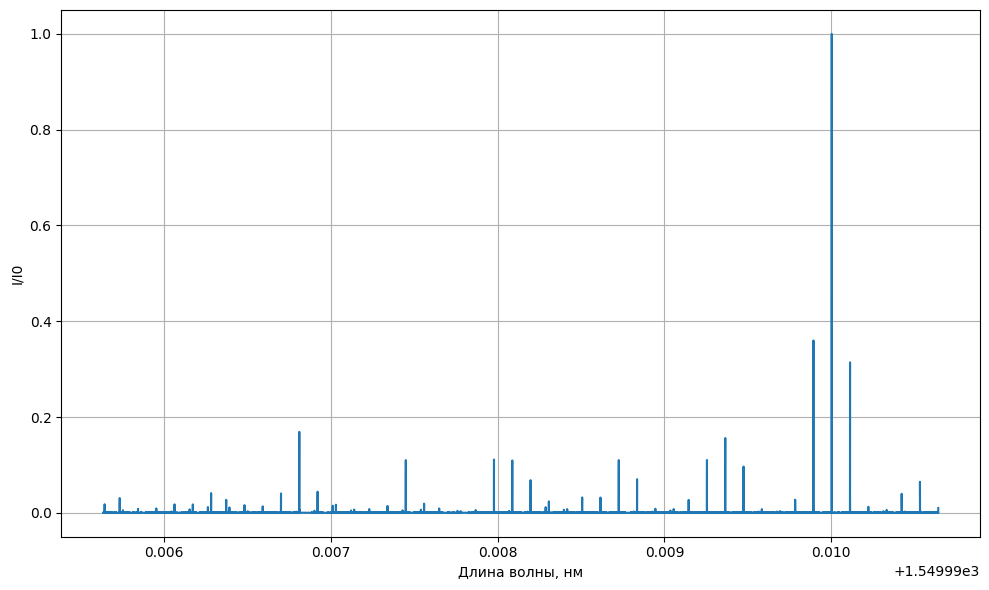

In [26]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
# Загрузка данных
df = pd.read_csv('50mks1mSA0.csv')
spectr1 = np.array(df.iloc[:,0])
spectr1 = np.linspace(1.4100E-04, 6.4100E-04, 625000)
Spectr1 = np.array(df.iloc[:,1])
dt = spectr1[1] - spectr1[0]
# Вычисление FFT
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]
fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))
# Константы
c = 3e8
n = 1.46
h = 1550e-9
N = 3
M = 4
α = 0.00018
k1 = k3 = 0.25
k2 = 0.032
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)
f_Er = c/h
freq = freq - 80e6 + c/h
#Вычисление FSR
l = 2.181353
L = 2.77
FSR = N * c / (n * l)
γ1 = np.exp(-α * l) 
γ2 = np.exp(-α * L)
T1 = n*l/c
T2 = n*L/c
def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*T1/N)
    return (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M)))) / \
            (1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M) + \
            C1 * C3 * γ1 * γ2 * z**(-(N + M)))
T_values = np.abs(t_filter_first(freq))
lambdasus = c/freq/(1e-9) 
plt.figure(figsize = (10,6))
plt.plot(lambdasus, T_values)
plt.xlim([h/(1e-9)- 2.5e-4 , h/(1e-9) + 2.5e-4])
plt.plot(lambdasus, np.abs(fft_signal_norm))
plt.xlabel('Длина волны, нм')
plt.ylabel('I/I0 и пропускание')
plt.grid()
plt.figure(figsize = (10,6))
plt.plot(lambdasus, T_values)
plt.xlabel('Длина волны, нм')
plt.ylabel('Пропускание')
plt.grid()
plt.figure(figsize = (10,6))
plt.plot(lambdasus, np.abs(fft_signal_norm))
plt.xlabel('Длина волны, нм')
plt.ylabel('Пропускание')
plt.xlabel('Длина волны, нм')
plt.ylabel('I/I0')
plt.grid(True)
plt.tight_layout()
plt.show()